In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp
import os 
import glob
plt.style.use("ggplot")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [149]:
df=pd.read_excel('soybean clean dataset.xlsx')
df.head()

,Salicylic Acid,Water Stress,Genotypes,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA)
0,C1,S1,G5,130.3,111,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,0.82,133943600
1,C2,S3,G4,132.0,80,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,0.13,12613100
2,C2,S1,G6,150.0,83,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,0.15,88626100
3,C1,S1,G1,140.8,66,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,0.14,157577800
4,C1,S2,G6,175.6,73,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,0.6,72960400


In [76]:
df.shape

(55450, 15)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Salicylic Acid                           55450 non-null  object 
 1   Water Stress                             55450 non-null  object 
 2   Genotypes                                55450 non-null  object 
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  int64  
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [150]:
df['Protein Content (PCO)'] = pd.to_numeric(df['Protein Content (PCO)'], errors='coerce')


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Salicylic Acid                           55450 non-null  object 
 1   Water Stress                             55450 non-null  object 
 2   Genotypes                                55450 non-null  object 
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  int64  
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [84]:
df.describe(include='all')

,Salicylic Acid,Water Stress,Genotypes,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA)
count,55450,55450,55450,55450.000000,55450.000000,55450.00000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,53909.000000,5.545000e+04
unique,2,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C2,S1,G5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,27726,20026,9242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,144.938979,114.533886,398.94661,627.210983,3.937670,2.399096,36.042123,35.349129,0.072132,2.020076,0.478102,8.998303e+07
std,NaN,NaN,NaN,20.015994,48.925533,257.48728,184.248647,2.846317,1.187323,2.417205,4.999200,0.022278,0.245889,0.226153,4.684108e+07
min,NaN,NaN,NaN,75.000000,32.000000,0.18000,0.640000,1.000000,1.100000,31.100000,26.400000,0.020000,1.400000,0.120000,2.470000e+03
25%,NaN,NaN,NaN,131.400000,80.000000,182.00000,625.000000,1.500000,1.300000,33.600000,32.200000,0.060000,1.850000,0.320000,5.191320e+07
50%,NaN,NaN,NaN,147.000000,102.000000,423.00000,673.000000,2.300000,2.200000,36.600000,34.500000,0.080000,2.050000,0.440000,8.767650e+07
75%,NaN,NaN,NaN,158.000000,133.000000,563.00000,722.000000,6.700000,3.100000,38.000000,37.200000,0.090000,2.200000,0.600000,1.217476e+08


In [85]:
df.columns

Index(['Salicylic Acid', 'Water Stress', 'Genotypes', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)',
       'Seed Yield per Unit Area (SYUA)'],
      dtype='object')

In [61]:
df['Genotypes'].value_counts()

Genotypes
G5    9242
G4    9242
G2    9242
G3    9242
G6    9241
G1    9241
Name: count, dtype: int64

In [62]:
df['Salicylic Acid'].value_counts()

Salicylic Acid
C2    27726
C1    27724
Name: count, dtype: int64

In [ ]:
df['Water Stress'].value_counts()

Water Stress
S1    20026
S3    18484
S2    16940
Name: count, dtype: int64

In [87]:
# categorical features
cat_features = ['Genotypes', 'Salicylic Acid', 'Water Stress']
# numerical features
num_features = df.drop(columns=cat_features).columns.tolist()

<Axes: >

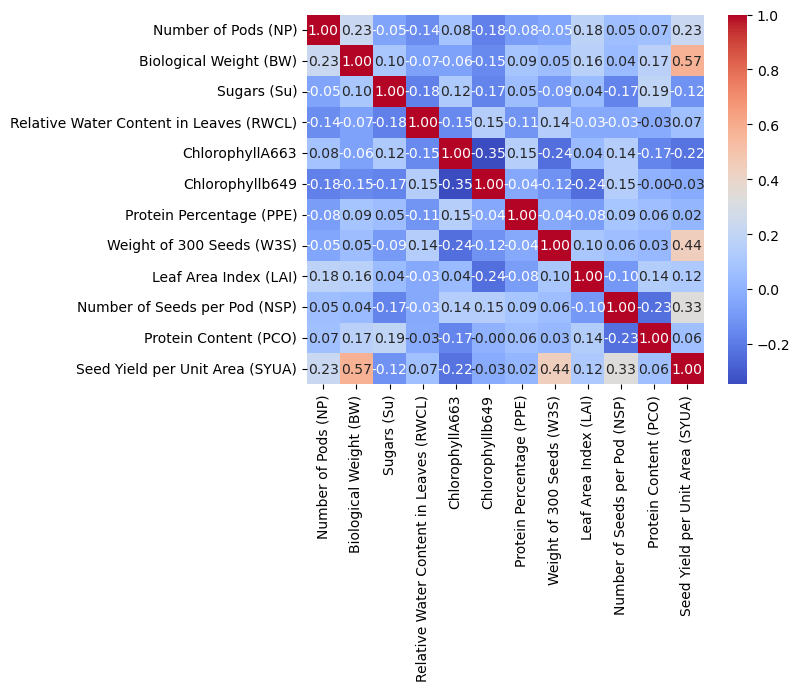

In [ ]:
# Matrice de correlation
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [92]:
df[num_features].corr()['Seed Yield per Unit Area (SYUA)'].sort_values(ascending=False)

Seed Yield per Unit Area (SYUA)            1.000000
Biological Weight (BW)                     0.574290
Weight of 300 Seeds (W3S)                  0.440054
Number of Seeds per Pod (NSP)              0.332377
Number of Pods (NP)                        0.227771
Leaf Area Index (LAI)                      0.116095
Relative Water Content in Leaves (RWCL)    0.067240
Protein Content (PCO)                      0.061076
Protein Percentage (PPE)                   0.020384
Chlorophyllb649                           -0.026583
Sugars (Su)                               -0.124738
ChlorophyllA663                           -0.224608
Name: Seed Yield per Unit Area (SYUA), dtype: float64

<Axes: xlabel='Seed Yield per Unit Area (SYUA)', ylabel='Count'>

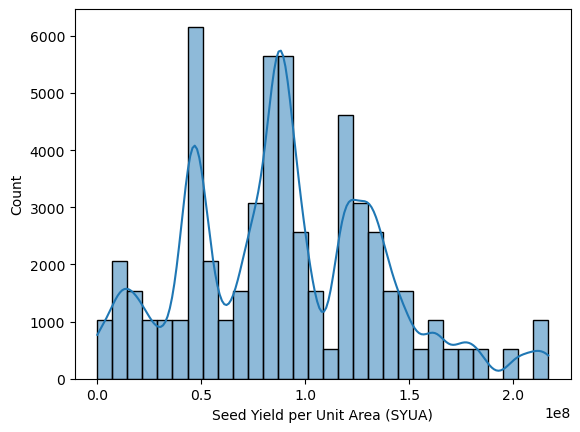

In [ ]:
# distribution de la variable cible 
sns.histplot(df['Seed Yield per Unit Area (SYUA)'], kde=True, bins=30)

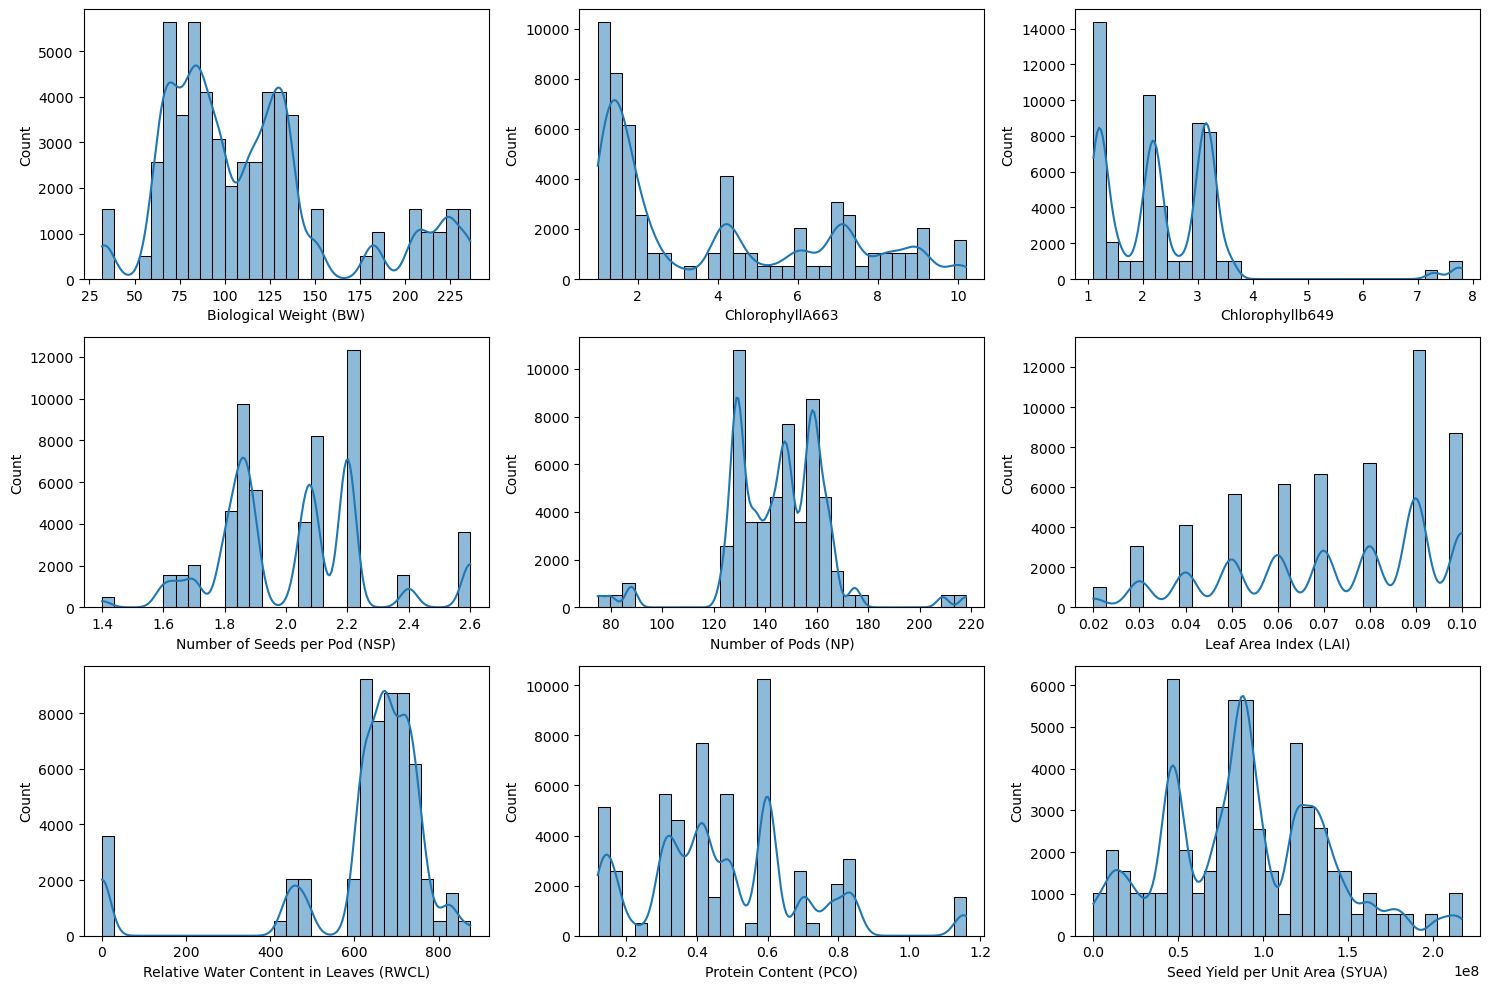

In [100]:
# distribution de chacune des variables numerique
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  
sns.histplot(df['Biological Weight (BW)'], kde=True, bins=30, ax=axes[0, 0])
sns.histplot(df['ChlorophyllA663'], kde=True, bins=30, ax=axes[0, 1])
sns.histplot(df['Chlorophyllb649'], kde=True, bins=30, ax=axes[0, 2])
sns.histplot(df['Number of Seeds per Pod (NSP)'], kde=True, bins=30, ax=axes[1, 0])
sns.histplot(df['Number of Pods (NP)'], kde=True, bins=30, ax=axes[1, 1])
sns.histplot(df['Leaf Area Index (LAI)'], kde=True, bins=30, ax=axes[1, 2])  
sns.histplot(df['Relative Water Content in Leaves (RWCL)'], kde=True, bins=30, ax=axes[2, 0])  
sns.histplot(df['Protein Content (PCO)'], kde=True, bins=30, ax=axes[2, 1])    
sns.histplot(df['Seed Yield per Unit Area (SYUA)'], kde=True, bins=30, ax=axes[2, 2])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Effet du Genotype sur le Seed Yield per Unit Area (SYUA)')

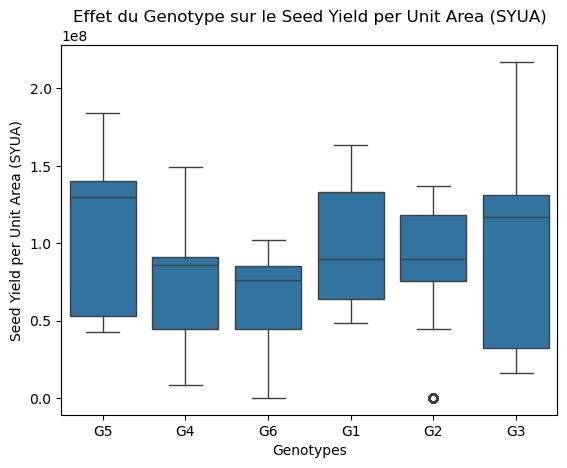

In [107]:
# boxplot de la variable cible par rapport aux variables categorique
sns.boxplot(x='Genotypes', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Effet du Genotype sur le Seed Yield per Unit Area (SYUA)')

Text(0.5, 1.0, 'Effet du Salicylic Acid sur le Seed Yield per Unit Area (SYUA)')

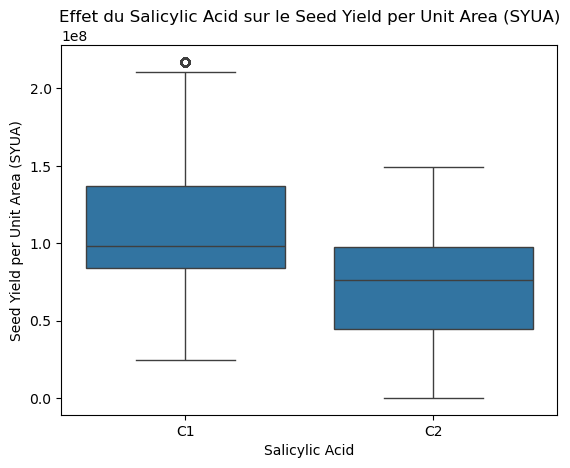

In [109]:
# boxeplot de la variable salicylic acid par rapport aux seed yield
sns.boxplot(x='Salicylic Acid', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Effet du Salicylic Acid sur le Seed Yield per Unit Area (SYUA)')

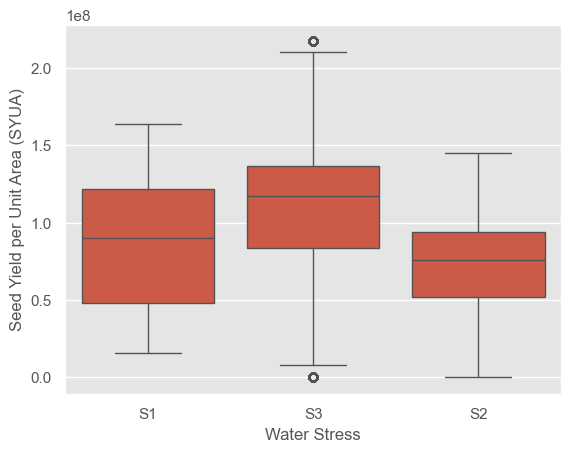

In [119]:
# boxeplot de la variable water stress par rapport aux seed yield
sns.boxplot(x='Water Stress', y='Seed Yield per Unit Area (SYUA)', data=df) 
plt.show()

In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=cat_features, drop_first=False, dtype=int) 

# Data preprocessing
X= df.drop(columns=['Seed Yield per Unit Area (SYUA)'])
y = df['Seed Yield per Unit Area (SYUA)']  

cols_cat=X.columns[11:]

# Normalistion des variables numeriques
# Fonction pour normaliser 

from sklearn.preprocessing import StandardScaler
def Normalistation(X):
    """ Normalisation des features X 

   # Returns:
      #  X  Normaliser avec le StandartScaler
    """
    X_index=X.index
    X_col=X.columns

    # On retire  les variables Categorielles
    X=X.drop(df[cols_cat], inplace=True)
    X=StandardScaler().fit_transform(X) # ici on a une matrice numpy

    X=pd.DataFrame(X, index=X_index, columns=X_col) # conversion en data frame
    
    # Apres normalisation on fait une concatenation 
    X=pd.concat[X,df1[cols_cat]]
    
    return X

X.columns

Index(['Number of Pods (NP)', 'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)',
       'Genotypes_G1', 'Genotypes_G2', 'Genotypes_G3', 'Genotypes_G4',
       'Genotypes_G5', 'Genotypes_G6', 'Salicylic Acid_C1',
       'Salicylic Acid_C2', 'Water Stress_S1', 'Water Stress_S2',
       'Water Stress_S3'],
      dtype='object')

In [147]:
# Split du data frame en train et test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(f'Training set shape : {X_train.shape} \t {y_train.shape}')
print(f'Testinn set shape : {X_test.shape} \t {y_test.shape}')
X_train=Normalistation(X_train)
X_test = Normalistation(X_test)

Training set shape : (44360, 22) 	 (44360,)
Testinn set shape : (11090, 22) 	 (11090,)


KeyError: "['Seed Yield per Unit Area (SYUA)', 'Genotypes_G1', 'Genotypes_G2', 'Genotypes_G3', 'Genotypes_G4', 'Genotypes_G5', 'Genotypes_G6', 'Salicylic Acid_C1', 'Salicylic Acid_C2', 'Water Stress_S1', 'Water Stress_S2', 'Water Stress_S3'] not found in axis"

In [134]:
# importations des model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Importation des metriques
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fonction pour evaluer la metrics 
def model_evaluation(model):
    """Avec cette fonction on va valuer les metrics suivantes:
    - MSE
    - R^2
    -MAE
    Args:
        model (Estimator):
    """
    # Nom du model
    print(model)
    # Mean squard error 
    print(f'MSE of Train set : {mean_squared_error(y_train, model.predict(X_train))}')
    print(f'MSE of test set : {mean_squared_error(y_test,model.predict(X_test))}')

    # R^2 score
    print(f'R^2 of Train set : {r2_score(y_train, model.predict(X_train))}')
    print(f'M^2 of test set : {r2_score(y_test,model.predict(X_test))}')

    # Mean absolute error
    print(f'MAE of Train set : {mean_absolute_error(y_train, model.predict(X_train))}')
    print(f'MAE of test set : {mean_absolute_error(y_test,model.predict(X_test))}')
